# 4.3.4 抽出した文章群から日本語極性辞書にマッチする単語を特定しトーンを算出
抽出した文章群から乾・鈴木(2008)で公開された日本語評価極性辞書を用いて、マッチする単語を特定しトーンを算出する。ここでは、osetiと呼ばれる日本語評価極性辞書を用いて極性の判定を行うPythonのライブラリを用いた。

In [2]:
import pickle
data_frame_name = "ave_top_20"
# data_frame_name = "ave_worst_20"
# data_frame_name = "2021_top_20"
# data_frame_name = "2021_worst_20"


data_dir = f'/home/jovyan/work/4AnalysingText/{data_frame_name}'
with open(f"{data_dir}/before", "rb") as fp: 
    before_li = pickle.load(fp)
    
with open(f"{data_dir}/transition", "rb") as fp: 
    transition_period_li = pickle.load(fp)

with open(f"{data_dir}/after", "rb") as fp: 
    after_li = pickle.load(fp)


#各年度のサンプルサイズ
print(len(after_li), len(transition_period_li) ,len(before_li))

37 37 37


(array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 2., 0., 2., 1.,
        1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 5., 2.,
        1., 2., 2., 1., 0., 0., 1., 0., 0., 0., 2., 2., 1., 0., 2., 1.]),
 array([0.47692308, 0.48443531, 0.49194754, 0.49945977, 0.506972  ,
        0.51448423, 0.52199646, 0.52950868, 0.53702091, 0.54453314,
        0.55204537, 0.5595576 , 0.56706983, 0.57458206, 0.58209429,
        0.58960652, 0.59711875, 0.60463098, 0.61214321, 0.61965544,
        0.62716767, 0.6346799 , 0.64219213, 0.64970436, 0.65721659,
        0.66472882, 0.67224105, 0.67975328, 0.68726551, 0.69477774,
        0.70228997, 0.7098022 , 0.71731443, 0.72482666, 0.73233889,
        0.73985112, 0.74736335, 0.75487558, 0.76238781, 0.76990004,
        0.77741227, 0.78492449, 0.79243672, 0.79994895, 0.80746118,
        0.81497341, 0.82248564, 0.82999787, 0.8375101 , 0.84502233,
        0.85253456]),
 <BarContainer object of 50 artists>)

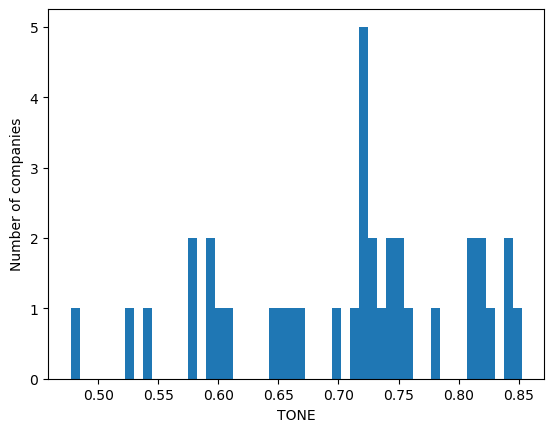

In [3]:
#beforeのヒストグラム
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.ylabel("Number of companies")
plt.xlabel("TONE")
ax.hist(before_li, bins=50)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2.,
        0., 2., 0., 0., 1., 0., 1., 1., 0., 3., 2., 0., 2., 1., 0., 1., 1.,
        1., 3., 1., 2., 2., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 2.]),
 array([0.45138889, 0.45948111, 0.46757333, 0.47566556, 0.48375778,
        0.49185   , 0.49994222, 0.50803444, 0.51612667, 0.52421889,
        0.53231111, 0.54040333, 0.54849556, 0.55658778, 0.56468   ,
        0.57277222, 0.58086444, 0.58895667, 0.59704889, 0.60514111,
        0.61323333, 0.62132556, 0.62941778, 0.63751   , 0.64560222,
        0.65369444, 0.66178667, 0.66987889, 0.67797111, 0.68606333,
        0.69415556, 0.70224778, 0.71034   , 0.71843222, 0.72652444,
        0.73461667, 0.74270889, 0.75080111, 0.75889333, 0.76698556,
        0.77507778, 0.78317   , 0.79126222, 0.79935444, 0.80744667,
        0.81553889, 0.82363111, 0.83172333, 0.83981556, 0.84790778,
        0.856     ]),
 <BarContainer object of 50 artists>)

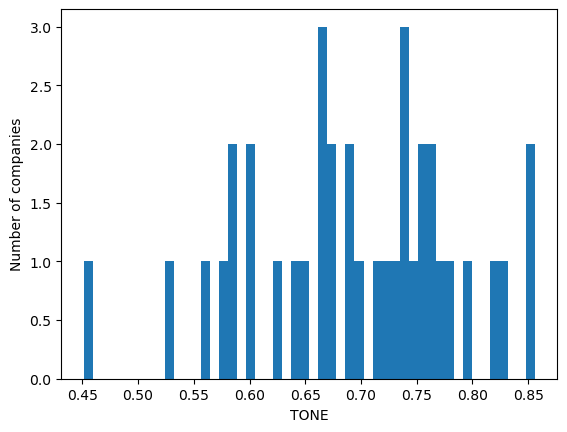

In [4]:
#transitionのヒストグラム
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.ylabel("Number of companies")
plt.xlabel("TONE")
ax.hist(transition_period_li, bins=50)

(array([1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 2.,
        0., 0., 0., 0., 0., 1., 2., 0., 1., 0., 0., 2., 2., 0., 1., 1., 1.,
        1., 2., 2., 0., 1., 0., 3., 0., 0., 1., 1., 1., 1., 1., 2., 3.]),
 array([0.40860215, 0.41621958, 0.42383701, 0.43145444, 0.43907187,
        0.4466893 , 0.45430673, 0.46192417, 0.4695416 , 0.47715903,
        0.48477646, 0.49239389, 0.50001132, 0.50762875, 0.51524618,
        0.52286361, 0.53048104, 0.53809847, 0.5457159 , 0.55333333,
        0.56095076, 0.56856819, 0.57618563, 0.58380306, 0.59142049,
        0.59903792, 0.60665535, 0.61427278, 0.62189021, 0.62950764,
        0.63712507, 0.6447425 , 0.65235993, 0.65997736, 0.66759479,
        0.67521222, 0.68282965, 0.69044709, 0.69806452, 0.70568195,
        0.71329938, 0.72091681, 0.72853424, 0.73615167, 0.7437691 ,
        0.75138653, 0.75900396, 0.76662139, 0.77423882, 0.78185625,
        0.78947368]),
 <BarContainer object of 50 artists>)

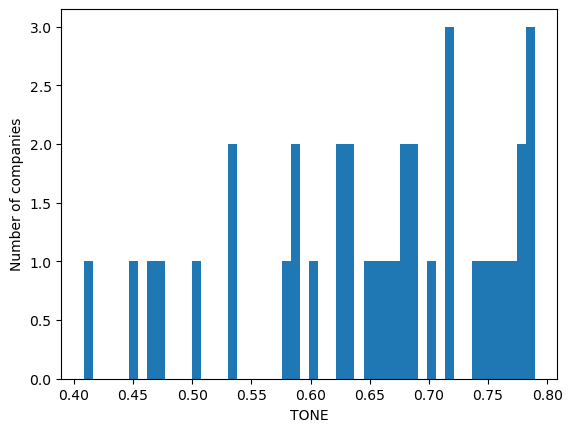

In [5]:
#afterのヒストグラム
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.ylabel("Number of companies")
plt.xlabel("TONE")
ax.hist(after_li, bins=50)

In [6]:
# 正規性の検定
  #before
import scipy.stats as stats
print(stats.shapiro(before_li))   
print(stats.kstest(before_li, "norm"))

ShapiroResult(statistic=0.9536482095718384, pvalue=0.12650637328624725)
KstestResult(statistic=0.6832915507352033, pvalue=1.1001697445364314e-17)


In [7]:
# 正規性の検定
   #transition
print(stats.shapiro(transition_period_li))   
print(stats.kstest(transition_period_li, "norm"))

ShapiroResult(statistic=0.9778217673301697, pvalue=0.6557575464248657)
KstestResult(statistic=0.6747130536096642, pvalue=3.4932282972311544e-17)


In [8]:
# 正規性の検定
   #after
print(stats.shapiro(after_li))   
print(stats.kstest(after_li, "norm"))

ShapiroResult(statistic=0.9382750988006592, pvalue=0.04066767916083336)
KstestResult(statistic=0.6585841738965423, pvalue=2.8533327281564997e-16)


In [9]:
 import numpy as np
    # 等分散性の検定
    #ex)  A=before_li, B=transition_period_li
def exec_f_test(A, B):
    A_var = np.var(A, ddof=1)  # Aの不偏分散
    B_var = np.var(B, ddof=1)  # Bの不偏分散
    A_df = len(A) - 1  # Aの自由度
    B_df = len(B) - 1  # Bの自由度
    f = A_var / B_var  # F比の値
    one_sided_pval1 = stats.f.cdf(f, A_df, B_df)  # 片側検定のp値 1
    one_sided_pval2 = stats.f.sf(f, A_df, B_df)   # 片側検定のp値 2
    two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値
    print('F:       ', round(f, 3))
    print('p-value: ', round(two_sided_pval, 3))

In [10]:
A=before_li
B=transition_period_li
exec_f_test(A, B)

F:        1.094
p-value:  0.788


In [11]:
A=transition_period_li
B=after_li
exec_f_test(A, B)

F:        0.777
p-value:  0.453


In [12]:
A=before_li
B=after_li
exec_f_test(A, B)

F:        0.85
p-value:  0.63


In [13]:
import numpy
print("before_li: ", numpy.average(before_li))
print("transition_period_lii: ", numpy.average(transition_period_li))
print("after_li: ", numpy.average(after_li))

before_li:  0.7052990306328784
transition_period_lii:  0.6947423766613199
after_li:  0.6523821125370048


In [14]:
import numpy
print("before_li: ", numpy.average(before_li))
print("transition_period_lii: ", numpy.average(transition_period_li))
print("after_li: ", numpy.average(after_li))

before_li:  0.7052990306328784
transition_period_lii:  0.6947423766613199
after_li:  0.6523821125370048


In [15]:
#ウェルチのt検定
stats.ttest_ind(before_li, transition_period_li, equal_var=False)

Ttest_indResult(statistic=0.4795524964162176, pvalue=0.6330020757444348)

In [16]:
#スチューデントのt検定
stats.ttest_ind(transition_period_li, after_li, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=1.8415500147815613, pvalue=0.06965986242858284)

In [17]:
#スチューデントのt検定
stats.ttest_ind(before_li, after_li, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=2.254389587901298, pvalue=0.02721486187727343)

In [18]:
#マンホイットニーのu検定
stats.mannwhitneyu( before_li, transition_period_li, alternative='two-sided')

MannwhitneyuResult(statistic=725.5, pvalue=0.6615014895526352)

In [19]:
stats.mannwhitneyu(transition_period_li, after_li, alternative='two-sided')

MannwhitneyuResult(statistic=823.0, pvalue=0.13572748859114314)

In [20]:
stats.mannwhitneyu(before_li, after_li, alternative='two-sided')

MannwhitneyuResult(statistic=873.0, pvalue=0.04210989755576322)